In [2]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from histo_utilities import create_TH1D, create_TH2D, std_color_list, EstimateDispersion

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

In [3]:
fpath = {}
tree = {}
process = {}
process_short = {}

fpath['mu'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-B0_MuNuDmst-pD0bar-kp-_NoPU_10-2-3_v1/BPH_Tag-Bm_D0kpmunu_Probe-B0_MuNuDmst-pD0bar-kp-_BPHRDntuplizer_merged_1-300.root'
process['mu'] = 'B_{0} #rightarrow D*^{-}(#bar{D}_{0}(K^{+}#pi^{-})#pi^{-})#mu^{+}#nu'
process_short['mu'] = 'B #rightarrow D*#mu#nu'

fpath['tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_BPHRDntuplizer_merged_1-300.root'
process['tau'] = 'B_{0} #rightarrow D*^{-}(#bar{D}_{0}(K^{+}#pi^{-})#pi^{-})#tau^{+}(#mu^{+}#nu#bar{#nu})#nu'
process_short['tau'] = 'B #rightarrow D*#tau#nu'

# fpath['Dst_mu'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_BPHMC_merged.root'
# process['Dst_mu'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#mu^{+}#nu'

# fpath['Dst_tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_BPHMC_merged.root'
# process['Dst_tau'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#tau^{+}(#mu^{+}#nu#nu)#nu'

for k,v in fpath.iteritems():
    tree[k] = rtnp.root2array(v)

In [4]:
DecayChannelBr = {}
DecayChannelBr['mu'] = 4.88e-2 * 67e-2 * 3.89e-2
DecayChannelBr['tau'] = 1.67e-2 * 17.39e-2 * 67e-2 * 3.89e-2

In [5]:
weights = {}

sumBr = np.sum(np.array(DecayChannelBr.values()))
for k,v in DecayChannelBr.iteritems():
    weights[k] = v/sumBr
    
print weights

{'mu': 0.9438317596679413, 'tau': 0.05616824033205858}


# D0 mass recostruction

Info in <TCanvas::Print>: png file ../fig/1902_1/D0mass_refit_B2mu.png has been created


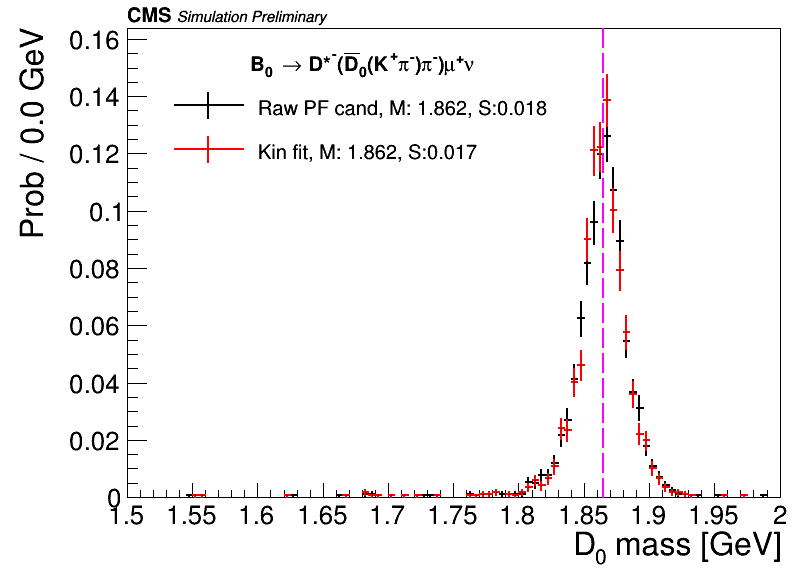

In [6]:
n = 'mu'
binning = [100, 1.5, 2.]

leg = rt.TLegend(0.2,0.7,0.7,0.93, process[n])
leg.SetTextFont(42)
leg.SetTextAlign(12)
leg.SetLineWidth(0)
leg.SetBorderSize(0)
leg.GetListOfPrimitives().First().SetTextAlign(22) 

h_pre = create_TH1D(tree[n]['D0prefit_mass'], name='h_'+n+'_D0mass_pre', binning=binning, axis_title=['D_{0} mass [GeV]', 'Prob / {:.1f} GeV'.format(binning[2]/binning[0])])
h_pre.Scale(1./h_pre.GetEntries())
d, e = EstimateDispersion(tree[n]['D0prefit_mass'])
leg.AddEntry(h_pre, 'Raw PF cand, M: {:.3f}, S:{:.3f}'.format(h_pre.GetMean(), d), 'le')

h_post = create_TH1D(tree[n]['D0reco_mass'], name='h_'+n+'_D0mass_post', binning=binning)
h_post.Scale(1./h_post.GetEntries())
h_post.SetLineColor(2)
d, e = EstimateDispersion(tree[n]['D0reco_mass'])
leg.AddEntry(h_post, 'Kin fit, M: {:.3f}, S:{:.3f}'.format(h_post.GetMean(), d), 'le')

c = rt.TCanvas('c_'+n+'_pt', 'c_'+n+'_pt',50,50,800,600)
c.SetTickx(0)
c.SetTicky(0)

h_pre.Draw()
h_post.Draw('SAME')
leg.Draw()

h_pre.GetYaxis().SetRangeUser(0, 1.3*h_pre.GetMaximum())

ln = rt.TLine()
ln.SetLineStyle(9)
ln.SetLineColor(6)
ln.SetLineWidth(2)
ln.DrawLine(1.86484, 0, 1.86484, h_pre.GetMaximum())

CMS_lumi.CMS_lumi(c, -1, 0)
c.Draw()
donotdelete.append([leg, h_pre, h_post, c])
c.SaveAs('../fig/1902_1/D0mass_refit_B2'+n+'.png')

# $D^{*-}$ mass recostruction

Warning in <TROOT::Append>: Replacing existing TH1: h_mu_Dstmass_pre (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_mu_Dstmass_post (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_mu_Dstmass
Info in <TCanvas::Print>: png file ../fig/1902_1/Dstmass_refit_B2mu.png has been created


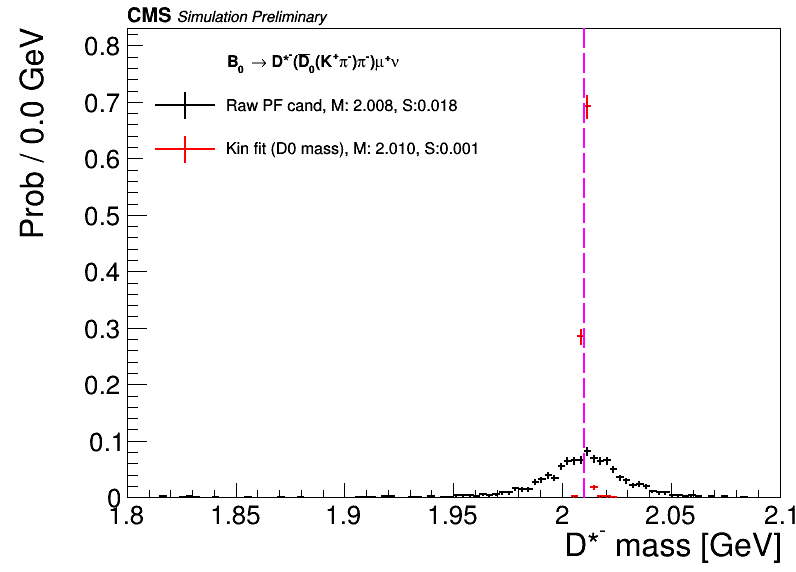

In [13]:
n = 'mu'
binning = [100, 1.8, 2.1]

leg = rt.TLegend(0.18,0.7,0.6,0.93, process[n])
leg.SetTextFont(42)
leg.SetTextAlign(12)
leg.SetLineWidth(0)
leg.SetBorderSize(0)
leg.GetListOfPrimitives().First().SetTextAlign(22) 

h_pre = create_TH1D(tree[n]['Dstprefit_mass'], name='h_'+n+'_Dstmass_pre', binning=binning, axis_title=['D*^{-} mass [GeV]', 'Prob / {:.1f} GeV'.format(binning[2]/binning[0])])
h_pre.Scale(1./h_pre.GetEntries())
d, e = EstimateDispersion(tree[n]['Dstprefit_mass'])
leg.AddEntry(h_pre, 'Raw PF cand, M: {:.3f}, S:{:.3f}'.format(h_pre.GetMean(), d), 'le')

h_post = create_TH1D(tree[n]['Dstreco_mass'], name='h_'+n+'_Dstmass_post', binning=binning)
h_post.Scale(1./h_post.GetEntries())
h_post.SetLineColor(2)
d, e = EstimateDispersion(tree[n]['Dstreco_mass'])
leg.AddEntry(h_post, 'Kin fit (D0 mass), M: {:.3f}, S:{:.3f}'.format(h_post.GetMean(), d), 'le')

c = rt.TCanvas('c_'+n+'_Dstmass', 'c_'+n+'_Dstmass',50,50,800,600)
c.SetTickx(0)
c.SetTicky(0)

h_pre.Draw()
h_post.Draw('SAME')
leg.Draw()

h_pre.GetYaxis().SetRangeUser(0, 1.2*np.max([h_pre.GetMaximum(), h_post.GetMaximum()]))

ln = rt.TLine()
ln.SetLineStyle(9)
ln.SetLineColor(6)
ln.SetLineWidth(2)
ln.DrawLine(2.01027, 0, 2.01027, h_pre.GetMaximum())

CMS_lumi.CMS_lumi(c, -1, 0)
c.Draw()
donotdelete.append([leg, h_pre, h_post, c])
c.SaveAs('../fig/1902_1/Dstmass_refit_B2'+n+'.png')

# Muon IP

Warning in <TROOT::Append>: Replacing existing TH1: h_ip_mu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_ip_tau (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_mu_Dstmass
Info in <TCanvas::Print>: png file ../fig/1902_1/IP_mu_tauVSmu.png has been created


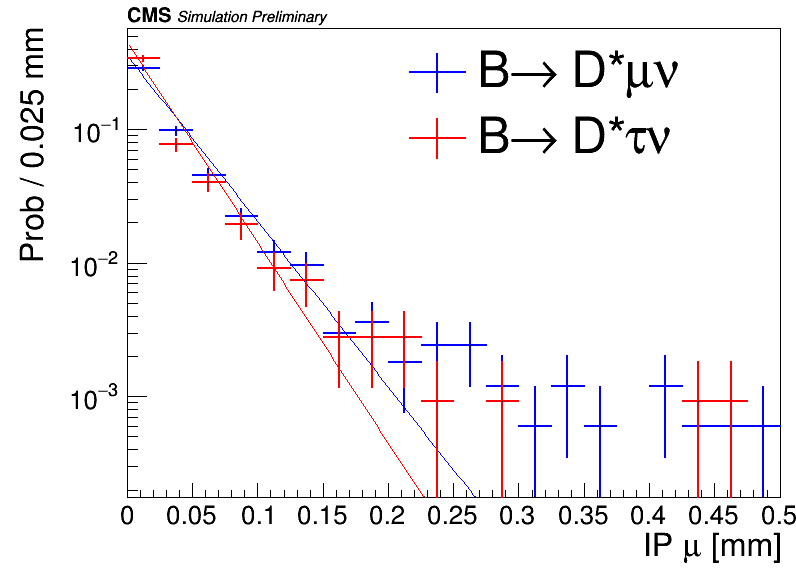

In [20]:
binning = [20, 0, 0.5]

leg = rt.TLegend(0.5,0.7,0.9,0.93)
leg.SetTextFont(42)
leg.SetTextAlign(12)
leg.SetLineWidth(0)
leg.SetBorderSize(0)

h_mu = create_TH1D(tree['mu']['ip_mu_RECO'], name='h_ip_mu', binning=binning, axis_title=['IP #mu [mm]', 'Prob / {:.3f} mm'.format(binning[2]/binning[0])])
h_mu.Scale(1./h_mu.GetEntries())
h_mu.SetLineColor(4)
f_mu = rt.TF1('f_mu','expo', binning[1], 0.3)
f_mu.SetLineColor(4)
f_mu.SetLineStyle(9)
h_mu.Fit(f_mu, 'LQR')
leg.AddEntry(h_mu, 'B#rightarrow D*#mu#nu', 'le')

h_tau = create_TH1D(tree['tau']['ip_mu_RECO'], name='h_ip_tau', binning=binning)
h_tau.Scale(1./h_tau.GetEntries())
h_tau.SetLineColor(2)
f_tau = rt.TF1('f_tau','expo', binning[1], 0.3)
f_tau.SetLineColor(2)
f_tau.SetLineStyle(9)
h_tau.Fit(f_tau, 'LQR')
leg.AddEntry(h_tau, 'B#rightarrow D*#tau#nu', 'le')

c = rt.TCanvas('c_'+n+'_Dstmass', 'c_'+n+'_Dstmass',50,50,800,600)
c.SetTickx(0)
c.SetTicky(0)

h_mu.SetStats(0)
h_mu.Draw()
h_tau.SetStats(0)
h_tau.Draw('SAME')
leg.Draw()

h_pre.GetYaxis().SetRangeUser(0, 1.2*np.max([h_tau.GetMaximum(), h_mu.GetMaximum()]))

CMS_lumi.CMS_lumi(c, -1, 0)
c.SetLogy()
c.Draw()
donotdelete.append([leg, h_pre, h_post, c])
c.SaveAs('../fig/1902_1/IP_mu_tauVSmu.png')